In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


STOCKS_FOLDER = "stocks"
MACROECOMOMIC_US_FOLDER = "macroeconomic_us"
MACROECOMOMIC_GLOBAL_FOLDER = "macroeconomic_global"
COMMODITY_FOLDER = "commodity"

In [6]:
data = pd.read_csv(f"{STOCKS_FOLDER}/^DJI.csv") #S&P 500
data.head()
data.columns = data.columns.str.strip() #remove leading and trailing spaces
data = data.drop(columns=["Dividends", "Stock Splits"]) # remove Dividends and Stock Splits

In [7]:
data['pct_change'] = (data['Close'] - data['Close'].shift(1))/ data['Close'].shift(1)
data['log_change'] = np.log(data['Close']/ data['Close'].shift(1))
data.head()

,Date,Open,High,Low,Close,Volume,pct_change,log_change
0,1992-01-02 00:00:00-05:00,3152.100098,3172.629883,3139.310059,3172.399902,23550000,NaN,NaN
1,1992-01-03 00:00:00-05:00,3172.399902,3210.639893,3165.919922,3201.500000,23620000,0.009173,0.009131
2,1992-01-06 00:00:00-05:00,3201.500000,3213.330078,3191.860107,3200.100098,27280000,-0.000437,-0.000437
3,1992-01-07 00:00:00-05:00,3200.100098,3210.199951,3184.479980,3204.800049,25510000,0.001469,0.001468
4,1992-01-08 00:00:00-05:00,3204.800049,3229.199951,3185.820068,3203.899902,29040000,-0.000281,-0.000281


In [8]:
from ta.trend import MACD, EMAIndicator, CCIIndicator
from ta.volatility import BollingerBands, AverageTrueRange
from ta.momentum import RSIIndicator, StochasticOscillator

# Calculate EMA (Exponential Moving Average) for different periods
data['7sma'] = EMAIndicator(data['Close'], window=7).ema_indicator()
data['14sma'] = EMAIndicator(data['Close'], window=14).ema_indicator()
data['21sma'] = EMAIndicator(data['Close'], window=21).ema_indicator()

# Calculate MACD and Signal Line using ta library
data['7macd'] = MACD(data['Close'], window_slow=11, window_fast=3, window_sign=7).macd()
data['7macd_signal'] = MACD(data['Close'], window_slow=11, window_fast=3, window_sign=7).macd_signal()
data['14macd'] = MACD(data['Close'], window_slow=21, window_fast=7, window_sign=14).macd()
data['14macd_signal'] = MACD(data['Close'], window_slow=21, window_fast=7, window_sign=14).macd_signal()

# Calculate MACD Histogram for different periods
data['7macd_histogram'] = data['7macd'] - data['7macd_signal']
data['14macd_histogram'] = data['14macd'] - data['14macd_signal']

# Calculate RSI (Relative Strength Index) for different periods
data['7rsi'] = RSIIndicator(data['Close'], window=7).rsi()
data['14rsi'] = RSIIndicator(data['Close'], window=14).rsi()
data['21rsi'] = RSIIndicator(data['Close'], window=21).rsi()

# Calculate ATR (Average True Range) for different periods
data['7atr'] = AverageTrueRange(data['High'], data['Low'], data['Close'], window=7).average_true_range()
data['14atr'] = AverageTrueRange(data['High'], data['Low'], data['Close'], window=14).average_true_range()
data['21atr'] = AverageTrueRange(data['High'], data['Low'], data['Close'], window=21).average_true_range()

# Calculate Bollinger Bands for different periods
bollinger_7 = BollingerBands(data['Close'], window=7)
data['7upper'] = bollinger_7.bollinger_hband()
data['7middle'] = bollinger_7.bollinger_mavg()
data['7lower'] = bollinger_7.bollinger_lband()

bollinger_14 = BollingerBands(data['Close'], window=14)
data['14upper'] = bollinger_14.bollinger_hband()
data['14middle'] = bollinger_14.bollinger_mavg()
data['14lower'] = bollinger_14.bollinger_lband()

bollinger_21 = BollingerBands(data['Close'], window=21)
data['21upper'] = bollinger_21.bollinger_hband()
data['21middle'] = bollinger_21.bollinger_mavg()
data['21lower'] = bollinger_21.bollinger_lband()

# Calculate CCI (Commodity Channel Index) for different periods
data['7cci'] = CCIIndicator(data['High'], data['Low'], data['Close'], window=7).cci()
data['14cci'] = CCIIndicator(data['High'], data['Low'], data['Close'], window=14).cci()
data['21cci'] = CCIIndicator(data['High'], data['Low'], data['Close'], window=21).cci()

# Drop rows with NaN values (produced by indicators' calculations)
data.dropna(inplace=True)

# Display the first few rows of the dataframe
data.head()


,Date,Open,High,Low,Close,Volume,pct_change,log_change,7sma,14sma,...,7lower,14upper,14middle,14lower,21upper,21middle,21lower,7cci,14cci,21cci
33,1992-02-19 00:00:00-05:00,3224.699951,3241.729980,3215.340088,3230.300049,22930000,0.001737,0.001735,3240.629600,3242.312597,...,3214.889032,3277.864795,3245.357160,3212.849526,3276.830400,3243.400019,3209.969637,-105.941159,-92.412653,-96.802716
34,1992-02-20 00:00:00-05:00,3230.600098,3283.770020,3230.550049,3280.600098,25840000,0.015571,0.015451,3250.622225,3247.417597,...,3211.635591,3285.130177,3247.907174,3210.684172,3281.835348,3246.123837,3210.412327,87.405196,98.193611,118.910752
35,1992-02-21 00:00:00-05:00,3280.600098,3286.669922,3252.909912,3280.199951,26840000,-0.000122,-0.000122,3258.016656,3251.788578,...,3210.682630,3289.991388,3251.964321,3213.937253,3285.668745,3247.285738,3208.902730,92.389222,121.767388,144.222253
36,1992-02-24 00:00:00-05:00,3280.199951,3289.800049,3266.100098,3282.399902,17880000,0.000671,0.000670,3264.112468,3255.870088,...,3209.772984,3295.061908,3255.414307,3215.766705,3289.928788,3249.938116,3209.947444,104.763827,133.769338,152.500970
37,1992-02-25 00:00:00-05:00,3282.199951,3282.199951,3240.379883,3257.800049,20980000,-0.007494,-0.007523,3262.534363,3256.127416,...,3211.966548,3292.847495,3254.342878,3215.838261,3290.491174,3251.128592,3211.766011,20.614850,33.490777,49.989000


In [9]:
data.head(10)

,Date,Open,High,Low,Close,Volume,pct_change,log_change,7sma,14sma,...,7lower,14upper,14middle,14lower,21upper,21middle,21lower,7cci,14cci,21cci
33,1992-02-19 00:00:00-05:00,3224.699951,3241.729980,3215.340088,3230.300049,22930000,0.001737,0.001735,3240.629600,3242.312597,...,3214.889032,3277.864795,3245.357160,3212.849526,3276.830400,3243.400019,3209.969637,-105.941159,-92.412653,-96.802716
34,1992-02-20 00:00:00-05:00,3230.600098,3283.770020,3230.550049,3280.600098,25840000,0.015571,0.015451,3250.622225,3247.417597,...,3211.635591,3285.130177,3247.907174,3210.684172,3281.835348,3246.123837,3210.412327,87.405196,98.193611,118.910752
35,1992-02-21 00:00:00-05:00,3280.600098,3286.669922,3252.909912,3280.199951,26840000,-0.000122,-0.000122,3258.016656,3251.788578,...,3210.682630,3289.991388,3251.964321,3213.937253,3285.668745,3247.285738,3208.902730,92.389222,121.767388,144.222253
36,1992-02-24 00:00:00-05:00,3280.199951,3289.800049,3266.100098,3282.399902,17880000,0.000671,0.000670,3264.112468,3255.870088,...,3209.772984,3295.061908,3255.414307,3215.766705,3289.928788,3249.938116,3209.947444,104.763827,133.769338,152.500970
37,1992-02-25 00:00:00-05:00,3282.199951,3282.199951,3240.379883,3257.800049,20980000,-0.007494,-0.007523,3262.534363,3256.127416,...,3211.966548,3292.847495,3254.342878,3215.838261,3290.491174,3251.128592,3211.766011,20.614850,33.490777,49.989000
38,1992-02-26 00:00:00-05:00,3257.800049,3290.919922,3254.469971,3283.300049,21160000,0.007827,0.007797,3267.725784,3259.750434,...,3215.206532,3297.478364,3256.178589,3214.878814,3294.500819,3253.161923,3211.823028,70.290893,103.990706,117.315275
39,1992-02-27 00:00:00-05:00,3283.300049,3286.899902,3265.879883,3269.500000,18710000,-0.004203,-0.004212,3268.169338,3261.050376,...,3233.163092,3299.032348,3257.171439,3215.310530,3294.164405,3253.038109,3211.911814,49.048049,80.144910,100.429272
40,1992-02-28 00:00:00-05:00,3269.500000,3293.379883,3259.389893,3267.699951,17960000,-0.000551,-0.000551,3268.051992,3261.936986,...,3256.616584,3298.390803,3260.192871,3221.994939,3294.644675,3255.071440,3215.498205,23.464424,68.243990,87.948372
41,1992-03-02 00:00:00-05:00,3267.699951,3276.620117,3261.399902,3275.300049,17220000,0.002326,0.002323,3269.864006,3263.718728,...,3256.520026,3300.305159,3262.350010,3224.394862,3296.717250,3256.519066,3216.320883,-24.076108,50.315295,71.064698
42,1992-03-03 00:00:00-05:00,3275.300049,3295.620117,3272.810059,3290.300049,19520000,0.004580,0.004569,3274.973017,3267.262904,...,3254.664395,3305.116946,3265.114293,3225.111639,3299.500920,3259.704787,3219.908655,147.602667,110.886558,128.152343


In [10]:
data.dropna(inplace=True)

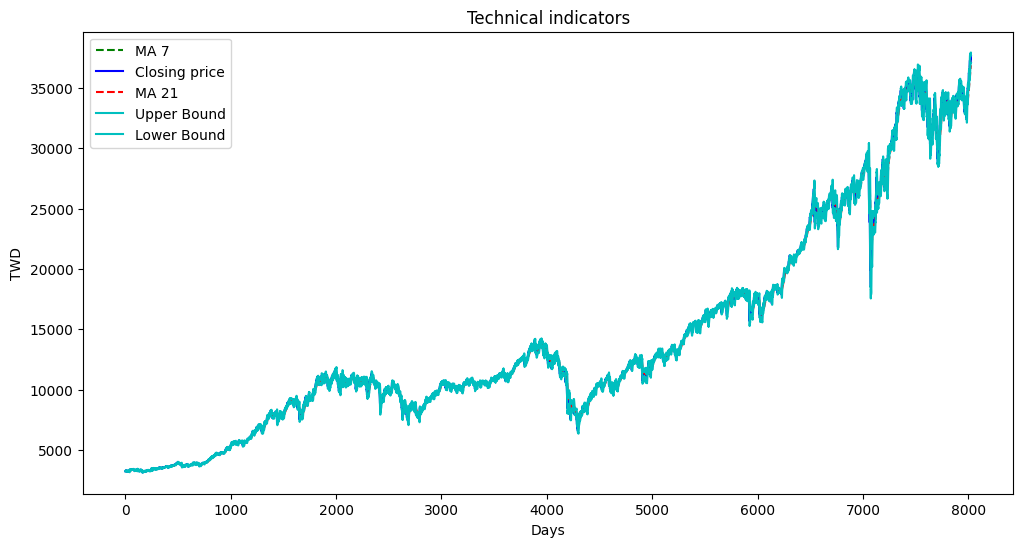

In [11]:
x_ = np.arange(data.shape[0])
plt.figure(figsize=(12, 6))
plt.plot(data['7sma'].values, label = 'MA 7', color = 'g', linestyle = '--')
plt.plot(data['Close'].values, label = 'Closing price', color = 'b')
plt.plot(data['21sma'].values, label = 'MA 21', color = 'r', linestyle = '--')
plt.plot(data['7upper'].values, label = 'Upper Bound', color = 'c')
plt.plot(data['7lower'].values, label = 'Lower Bound', color = 'c')
plt.fill_between(x_, data['7lower'].values, data['7upper'].values, alpha = 0.35)
plt.title('Technical indicators')
plt.ylabel('TWD')
plt.xlabel('Days')
plt.legend()


c:\Python311\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Python311\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Python311\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Python311\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Python311\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Python311\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Python311\Lib\site-packages\mat

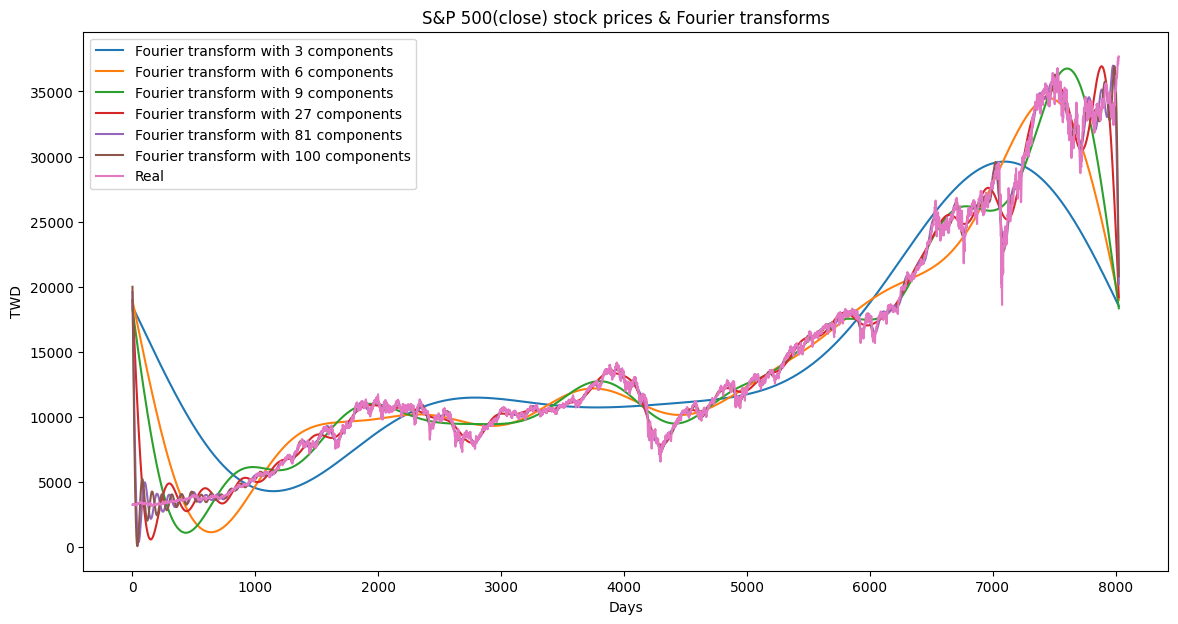

In [8]:
import numpy as np

close_fft = np.fft.fft(np.asarray(data['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 27, 81, 100]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_] = 0
    data[f'FT_{num_}components'] = np.fft.ifft(fft_list_m10)
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(data['Close'].values,  label='Real')
plt.xlabel('Days')
plt.ylabel('TWD')
plt.title('S&P 500(close) stock prices & Fourier transforms')
plt.legend()
plt.show()

In [9]:
data['FT_3components'] = data['FT_3components'].astype('float')
data['FT_6components'] = data['FT_6components'].astype('float')
data['FT_9components'] = data['FT_9components'].astype('float')
data['FT_27components'] = data['FT_27components'].astype('float')
data['FT_81components'] = data['FT_81components'].astype('float')
data['FT_100components'] = data['FT_100components'].astype('float')
data.head()

c:\Python311\Lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
c:\Python311\Lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
c:\Python311\Lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
c:\Python311\Lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
c:\Python311\Lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
c:\Python311\Lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to rea

,Date,Open,High,Low,Close,Volume,pct_change,log_change,7sma,14sma,...,21lower,7cci,14cci,21cci,FT_3components,FT_6components,FT_9components,FT_27components,FT_81components,FT_100components
33,1992-02-19 00:00:00-05:00,3224.699951,3241.729980,3215.340088,3230.300049,22930000,0.001737,0.001735,3240.629600,3242.312597,...,3209.969637,-105.941159,-92.412653,-96.802716,18480.282025,18931.434082,18266.973348,18967.708867,19576.815661,19989.809493
34,1992-02-20 00:00:00-05:00,3230.600098,3283.770020,3230.550049,3280.600098,25840000,0.015571,0.015451,3250.622225,3247.417597,...,3210.412327,87.405196,98.193611,118.910752,18460.524254,18885.910686,18197.449478,18756.365131,18942.339425,19179.903507
35,1992-02-21 00:00:00-05:00,3280.600098,3286.669922,3252.909912,3280.199951,26840000,-0.000122,-0.000122,3258.016656,3251.788578,...,3208.902730,92.389222,121.767388,144.222253,18440.763375,18840.380278,18127.947635,18545.058834,18307.424869,18368.280759
36,1992-02-24 00:00:00-05:00,3280.199951,3289.800049,3266.100098,3282.399902,17880000,0.000671,0.000670,3264.112468,3255.870088,...,3209.947444,104.763827,133.769338,152.500970,18420.999440,18794.843232,18058.468992,18333.822198,17672.943424,17556.724707
37,1992-02-25 00:00:00-05:00,3282.199951,3282.199951,3240.379883,3257.800049,20980000,-0.007494,-0.007523,3262.534363,3256.127416,...,3211.766011,20.614850,33.490777,49.989000,18401.232502,18749.299924,17989.014721,18122.687407,17039.765720,16747.020085


In [10]:
data.to_csv('./Train_Data/data.csv')